# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

## Linear SVM with Iris

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge")),])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5, 1.7],[5.5, 1.7]])

array([1., 1.])

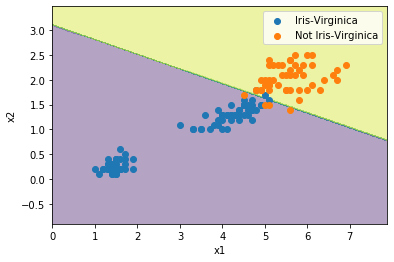

In [4]:
X0=X[np.where(y==0)]
X1=X[np.where(y==1)]

# obtain decision boundary
resolution = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = svm_clf.predict(xx).reshape(*xx1.shape)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X0[:,0],X0[:,1], label='Iris-Virginica')
plt.scatter(X1[:,0],X1[:,1], label = 'Not Iris-Virginica')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Non Linear SVM with Poly features

In [5]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge"))
                              ])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

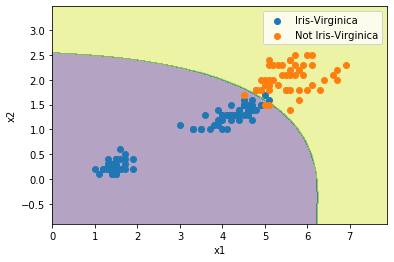

In [6]:
yy = polynomial_svm_clf.predict(xx).reshape(*xx1.shape)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X0[:,0],X0[:,1], label='Iris-Virginica')
plt.scatter(X1[:,0],X1[:,1], label = 'Not Iris-Virginica')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Non Linear SVM with kernel trick

In [7]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
                               ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

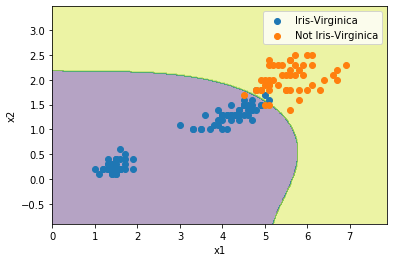

In [8]:
yy = poly_kernel_svm_clf.predict(xx).reshape(*xx1.shape)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X0[:,0],X0[:,1], label='Iris-Virginica')
plt.scatter(X1[:,0],X1[:,1], label = 'Not Iris-Virginica')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=.1, C=100))
                              ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

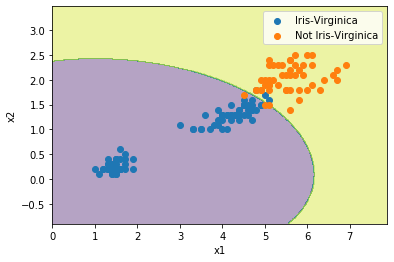

In [10]:
yy = rbf_kernel_svm_clf.predict(xx).reshape(*xx1.shape)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X0[:,0],X0[:,1], label='Iris-Virginica')
plt.scatter(X1[:,0],X1[:,1], label = 'Not Iris-Virginica')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()